In [ ]:
#setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [25]:
#reading csv file
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [27]:
#dropping 
df = df.drop("Person ID", axis = 1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [29]:
#null values
df1 = df.copy()
df1['Sleep Disorder'] = df1['Sleep Disorder'].fillna('None')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [30]:
#duplicates in dataframe
duplicate_rows = df1[df1.duplicated()]
duplicate_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 2 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   242 non-null    object 
 1   Age                      242 non-null    int64  
 2   Occupation               242 non-null    object 
 3   Sleep Duration           242 non-null    float64
 4   Quality of Sleep         242 non-null    int64  
 5   Physical Activity Level  242 non-null    int64  
 6   Stress Level             242 non-null    int64  
 7   BMI Category             242 non-null    object 
 8   Blood Pressure           242 non-null    object 
 9   Heart Rate               242 non-null    int64  
 10  Daily Steps              242 non-null    int64  
 11  Sleep Disorder           242 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.6+ KB


In [31]:
df1 = df1.drop_duplicates(subset = df1.columns[1:]).reset_index(drop = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   132 non-null    object 
 1   Age                      132 non-null    int64  
 2   Occupation               132 non-null    object 
 3   Sleep Duration           132 non-null    float64
 4   Quality of Sleep         132 non-null    int64  
 5   Physical Activity Level  132 non-null    int64  
 6   Stress Level             132 non-null    int64  
 7   BMI Category             132 non-null    object 
 8   Blood Pressure           132 non-null    object 
 9   Heart Rate               132 non-null    int64  
 10  Daily Steps              132 non-null    int64  
 11  Sleep Disorder           132 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 12.5+ KB


In [32]:
df1.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
4,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia


Checking Values and Categorical Values 

In [47]:
unique_values = {}
cat_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',  'Sleep Disorder']
for col in cat_columns:
    unique_values[col] = df[col].unique()
    
unique_values

{'Gender': array(['Male', 'Female'], dtype=object),
 'Occupation': array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
        'Salesperson', 'Manager'], dtype=object),
 'BMI Category': array(['Overweight', 'Normal', 'Obese', nan], dtype=object),
 'Blood Pressure': array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
        '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
        '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
        '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
        '118/75'], dtype=object),
 'Sleep Disorder': array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)}

BMI Category 

In [46]:
df['BMI Category']= df1['BMI Category'].replace({'Normal Weight': 'Normal'})
df['BMI Category'].value_counts().reset_index()

,BMI Category,count
0,Normal,73
1,Overweight,49
2,Obese,7


Blood Pressure

In [51]:
# Splitting Blood Pressure into Systolic Pressure and Diastolic Pressure by creating two new columns
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True)

# Converting the new columns to numeric values
df['Systolic Pressure'] = pd.to_numeric(df['Systolic Pressure'])
df['Diastolic Pressure'] = pd.to_numeric(df['Diastolic Pressure'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Obese,125/80,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [53]:
# Creating the Blood Pressure Category column
blood_pressure_conditions = [
    (df['Systolic Pressure'] < 120) & (df['Diastolic Pressure'] < 80),
    (df['Systolic Pressure'].between(120, 140)) & (df['Diastolic Pressure'] < 90),
    (df['Systolic Pressure'] >= 140) & (df['Diastolic Pressure'] >= 90) | (df['Diastolic Pressure'] >= 80)
]

labels = ['Optimal', 'Normal', 'Hypertension']

df['Blood Pressure Category'] = np.select(blood_pressure_conditions, labels, default='Undefined')
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Blood Pressure Category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80,Normal
2,Male,28,Doctor,6.2,6,60,8,Obese,125/80,75,10000,NaN,125,80,Normal
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension


Occupation

In [55]:
# Let's check the values in the Occupations column
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [56]:
# Merging similar Occupations
df["Occupation"] = df["Occupation"].replace({'Sales Representative': 'Salesperson'})

df["Occupation"] = df["Occupation"].replace({'Software Engineer': 'Engineer'})
# Deleting the Rows with Scientist and Manager as Occupation
index_drop = df[df['Occupation'].isin(['Manager', 'Scientist'])].index
df = df.drop(index_drop)
df['Occupation'].value_counts()

Occupation
Nurse          73
Doctor         71
Engineer       67
Lawyer         47
Teacher        40
Accountant     37
Salesperson    34
Name: count, dtype: int64

Analysis of Numerical Values

In [57]:
# Descriptive Statistics
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,42.271003,7.144986,7.338753,59.379404,5.368564,70.062331,6836.314363,128.552846,84.647696
std,8.682957,0.791829,1.175677,20.862834,1.775341,4.054508,1620.028673,7.796184,6.200938
min,27.000000,5.900000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,36.000000,6.500000,6.000000,45.000000,4.000000,68.000000,6000.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


Distrbution of Numerical Variables

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 57.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 57.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 57.2% of the points cannot be placed; you may want to decrease the size of the markers or use s

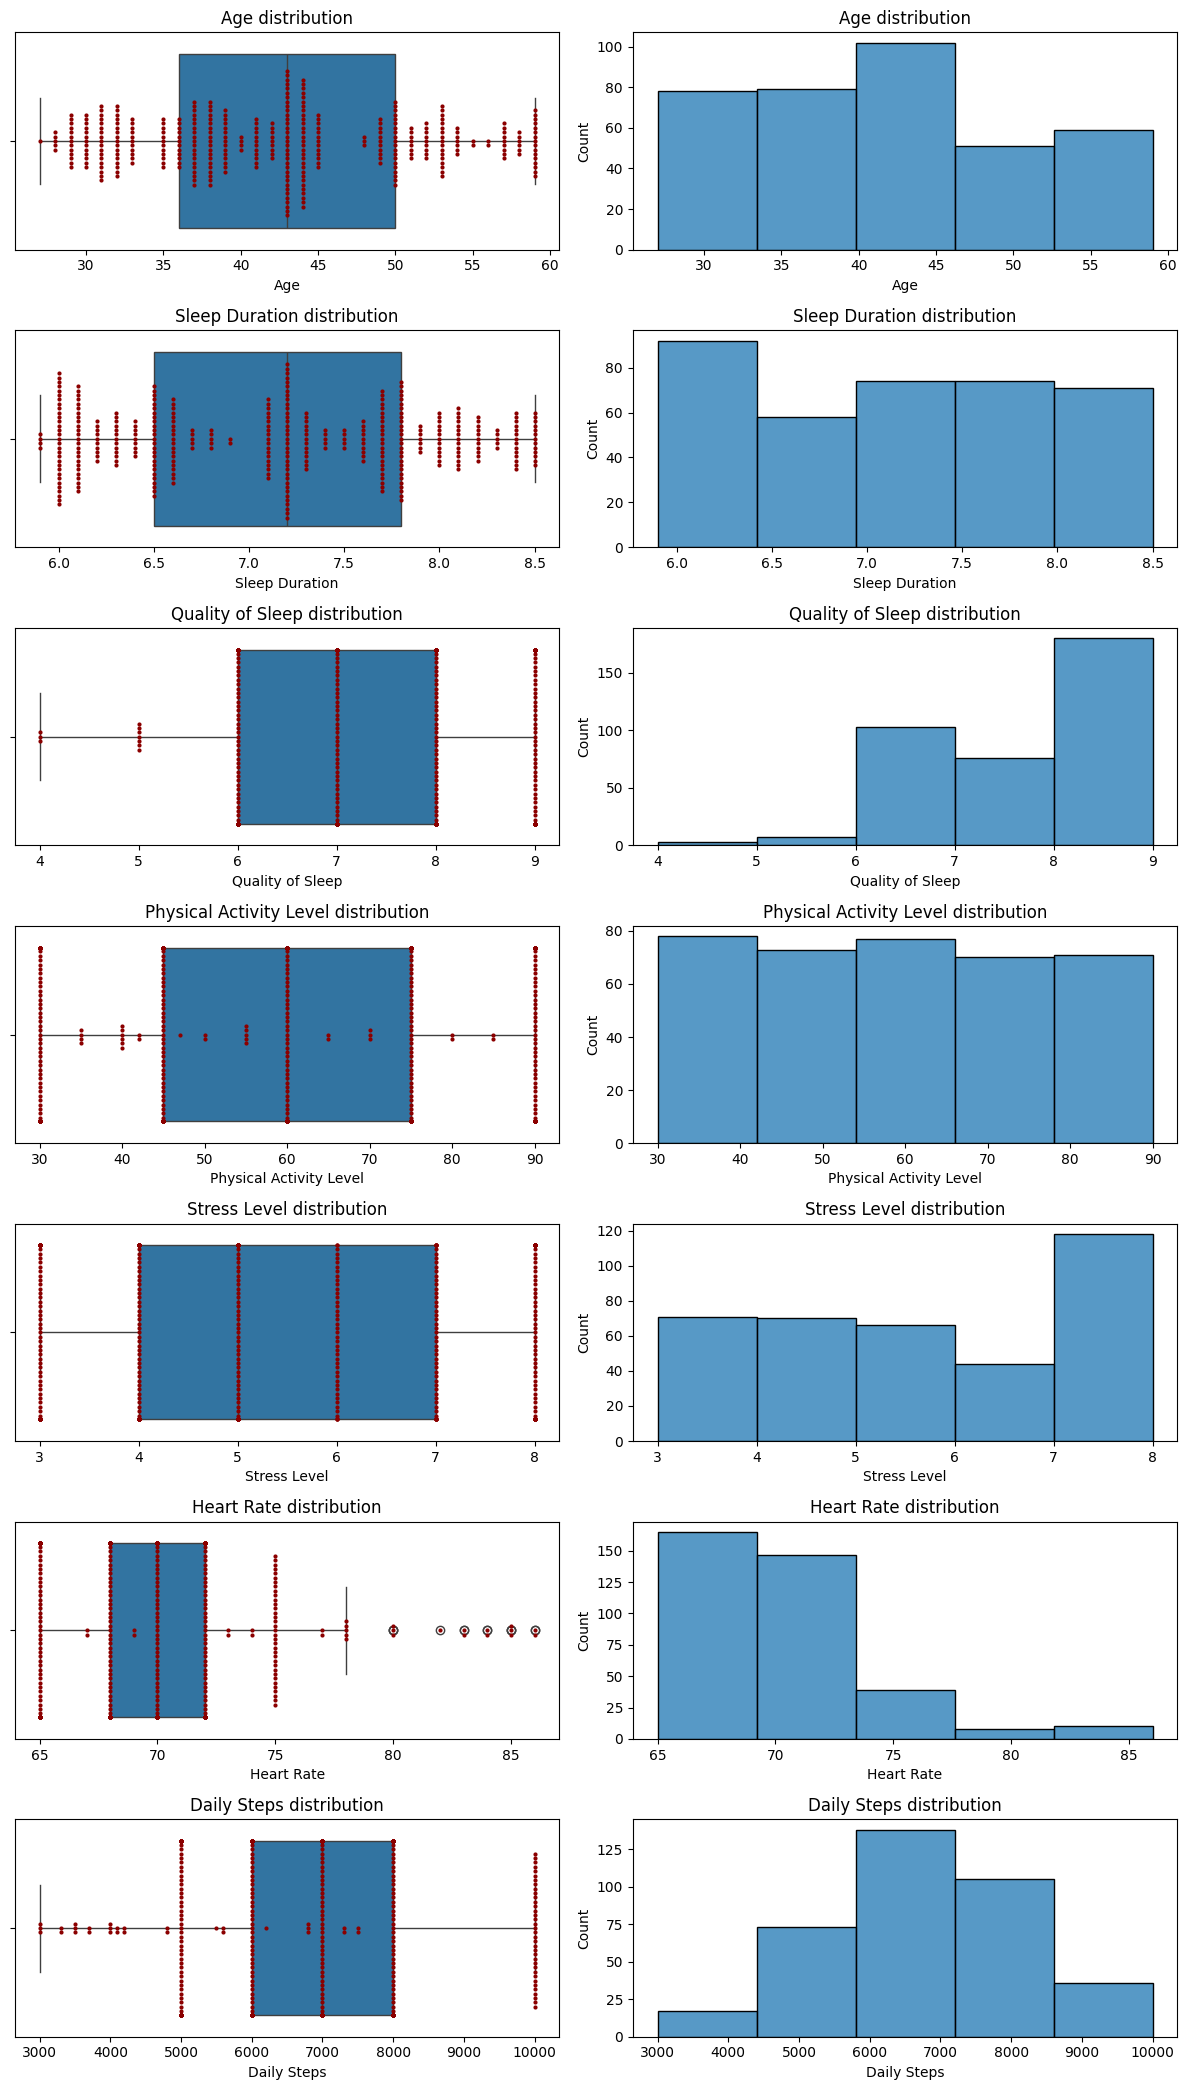

In [62]:
# List of numerical columns to plot
num_column = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Create a 7x2 subplot
fig, axs = plt.subplots(7, 2, figsize=(12, 3 * 7))

# Iterate through each numerical column
for col in num_column:
    # Swarmplot and boxplot on the left 
    sns.swarmplot(data=df, x=col,s=3, color='darkred', ax=axs[num_column.index(col), 0])
    sns.boxplot(data=df, x=col, ax=axs[num_column.index(col), 0])
    # Histogram on the right
    sns.histplot(data=df, x=col, bins=5, ax=axs[num_column.index(col), 1])
    
    axs[num_column.index(col), 0].set_title(col + ' distribution')
    axs[num_column.index(col), 1].set_title(col + ' distribution')

plt.tight_layout()
# Show the plots
plt.show()

Sleep Quality Data Statistics

Mean: 7.338753387533876
Median: 7.0
Mode: 8
Skewness: -0.15785368793273966
Kurtosis: -0.8954270006446223


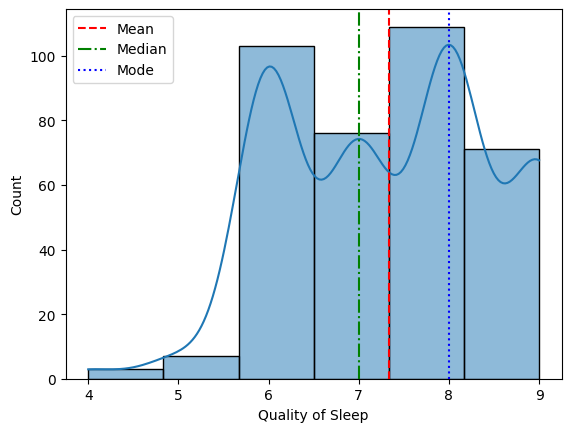

In [63]:
# Calculate the mean, median, and mode of Quality of Sleep
mean = df['Quality of Sleep'].mean()
median = df['Quality of Sleep'].median()
mode = df['Quality of Sleep'].mode()[0]

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create the histogram
sns.histplot(x = 'Quality of Sleep', data = df, bins = 6, kde = True)

# Add mean, median, and mode to the graph
plt.axvline(x = mean, color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(x = median, color = 'green', linestyle = '-.', label = 'Median')
plt.axvline(x = mode, color = 'blue', linestyle = ':', label = 'Mode')
plt.legend()

# Calculate the skewness and kurtosis
skewness = stats.skew(df['Quality of Sleep'])
kurtosis = stats.kurtosis(df['Quality of Sleep'])

# Print the skewness and kurtosis
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Skewness:', skewness)
print('Kurtosis:', kurtosis)

# Show the plot
plt.show()

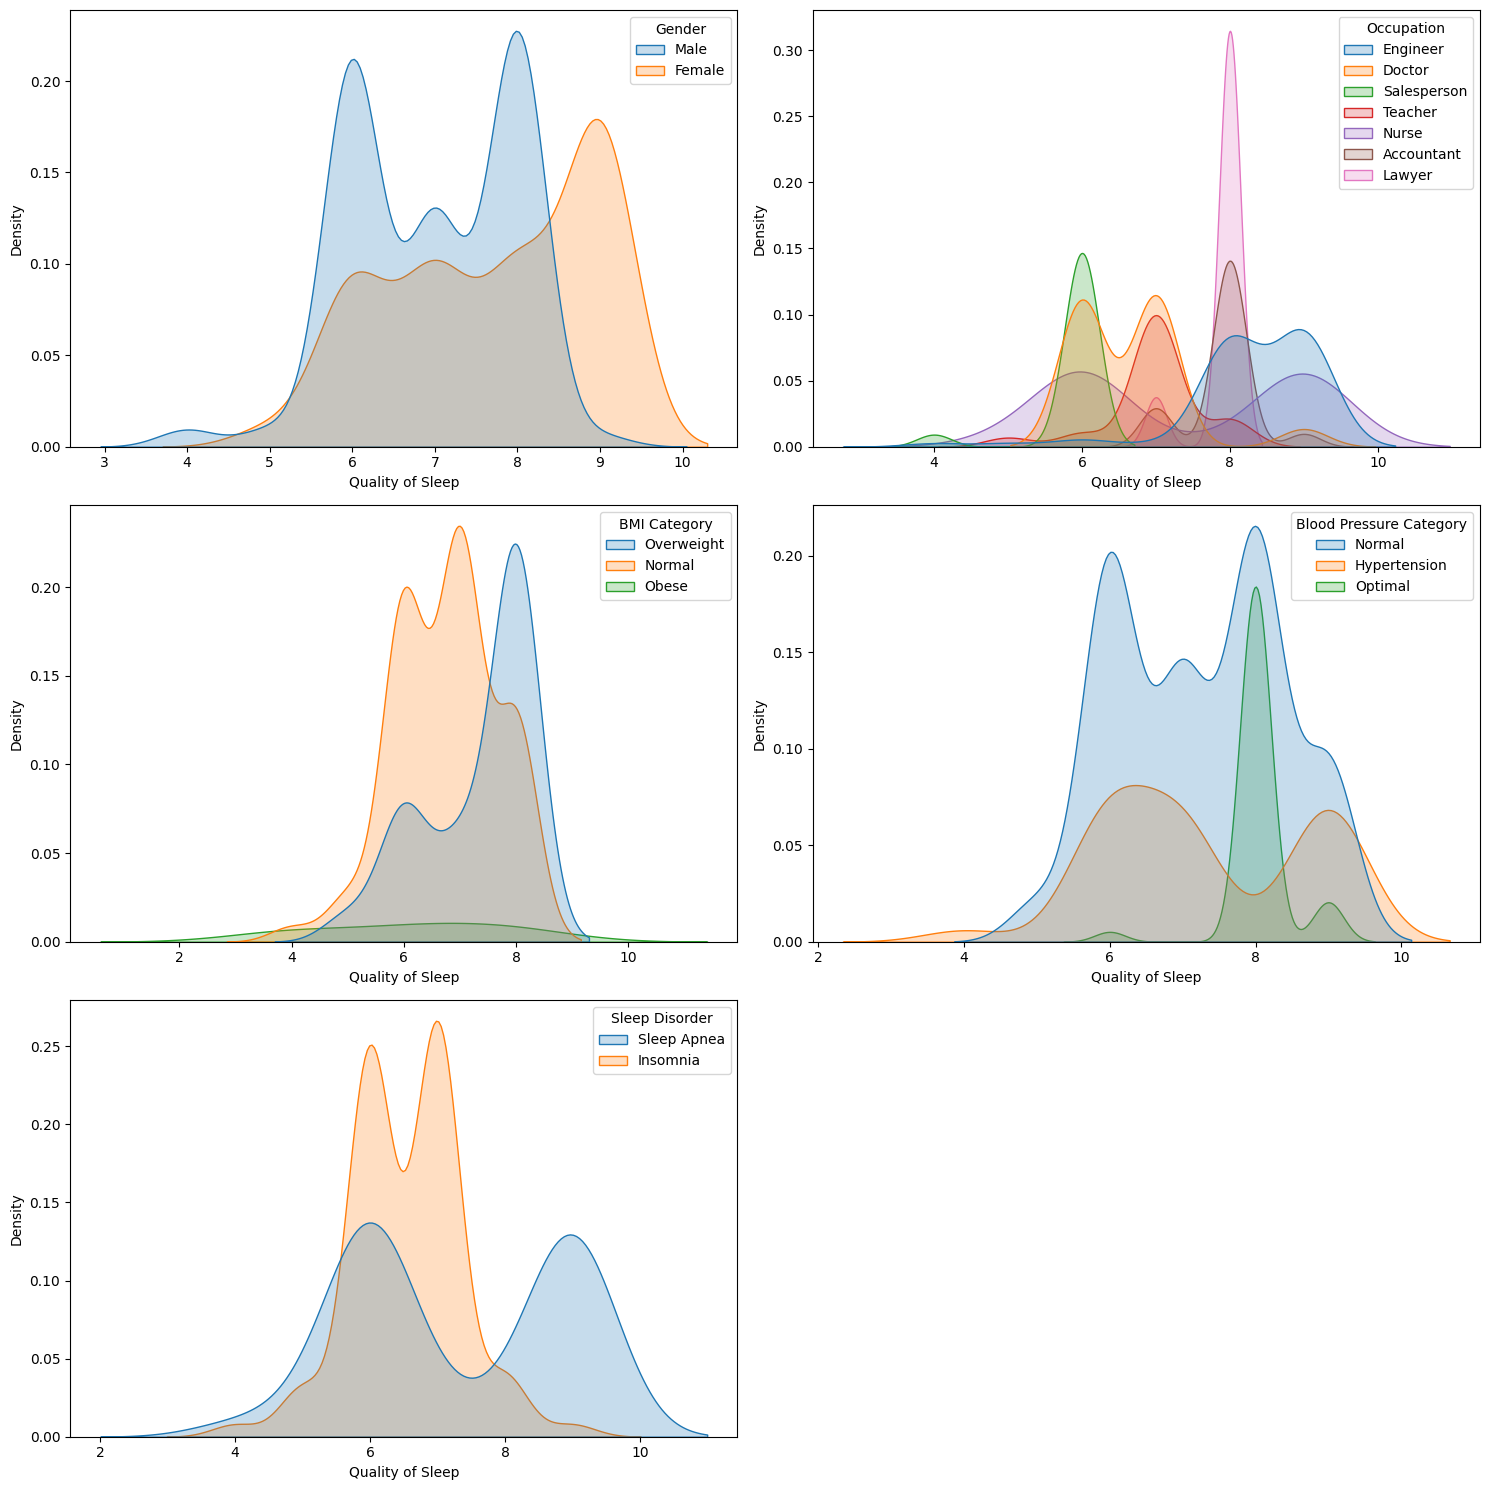

In [64]:
# Create a 3x2 subplot
fig, axes = plt.subplots(3, 2, figsize=(15,15))

# List of all the categorizations
categorizations = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure Category', 'Sleep Disorder']

# Flatten the axes array for easy indexing
axes_flat = axes.flatten()

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create boxplots using a for loop
for i,col in enumerate(categorizations):
    sns.kdeplot(x = 'Quality of Sleep', data = df, hue = col, fill = True,ax=axes_flat[i])

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

Analysis of Categorical Variables

In [ ]:
#Demongraphic Indicatiors 

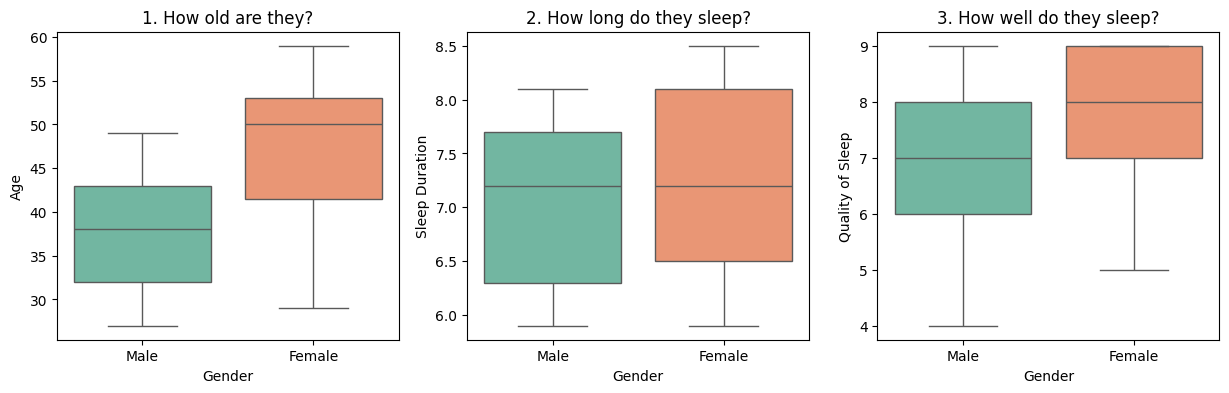

In [65]:
#Age and Gender
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(x="Gender", y="Age", data=df, hue="Gender", palette='Set2', ax=axs[0]).set_title("1. How old are they?")
sns.boxplot(x="Gender", y="Sleep Duration", data=df, hue="Gender", palette='Set2', ax=axs[1]).set_title("2. How long do they sleep?")
sns.boxplot(x="Gender", y="Quality of Sleep", data=df, hue="Gender", palette='Set2', ax=axs[2]).set_title("3. How well do they sleep?")

plt.show()

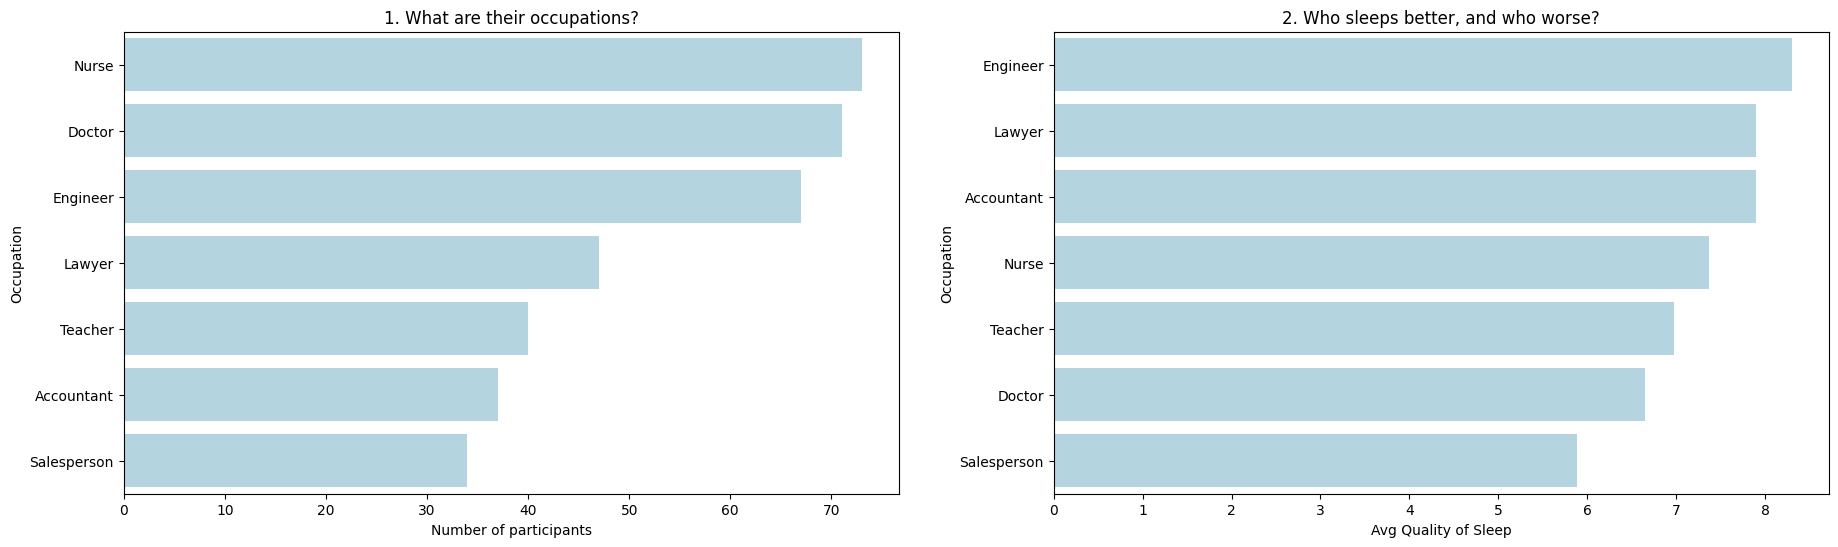

In [66]:
#Occupation
fig, axs = plt.subplots(1, 2, figsize=(22, 6))

# Occupations
occ = df.groupby("Occupation", as_index=False).size()
occ.sort_values("size", ascending=False, inplace=True)
sns.barplot(data=occ, y="Occupation", x="size", order=occ['Occupation'].values, ax=axs[0], color="lightblue")
axs[0].set(title="1. What are their occupations?", xlabel="Number of participants", ylabel="Occupation")

# Avg Quality Sleep by Occupations
occ_sleep = df.groupby("Occupation").agg({"Quality of Sleep": "mean"}).sort_values("Quality of Sleep", ascending=False)
sns.barplot(data=occ_sleep, y=occ_sleep.index, x="Quality of Sleep", ax=axs[1], color="lightblue")
axs[1].set(title="2. Who sleeps better, and who worse?", xlabel="Avg Quality of Sleep", ylabel="Occupation")

plt.show()

In [ ]:
#Health Indicatiors

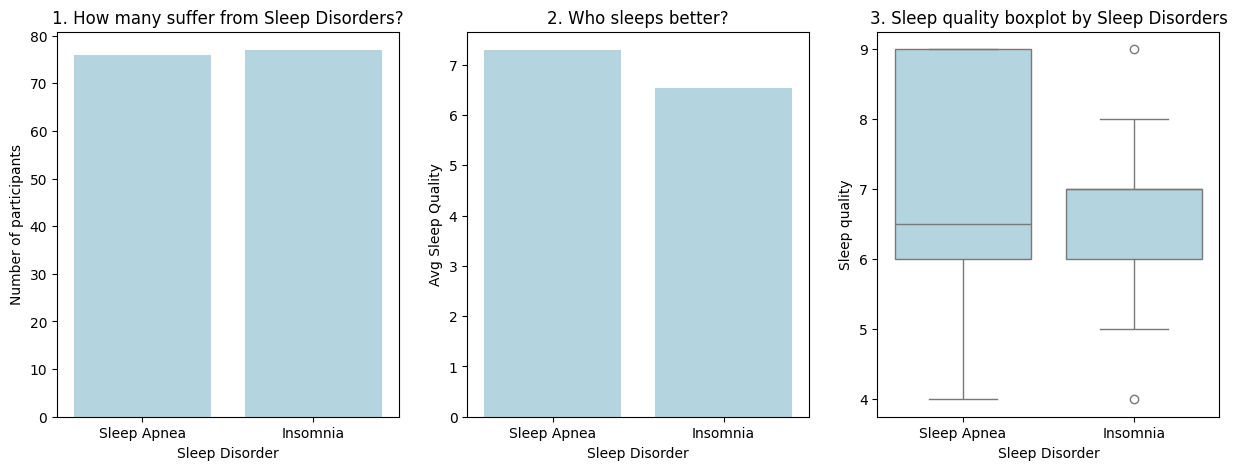

In [67]:
#Sleep Disorders
fig, axs = plt.subplots(1,3, figsize=(15, 5))

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.countplot(data=df, x="Sleep Disorder", color="lightblue",ax=axs[0]).set_title("1. How many suffer from Sleep Disorders?")
axs[0].set(xlabel="Sleep Disorder", ylabel="Number of participants")

sleep_disorder_quality_mean = df.groupby('Sleep Disorder')['Quality of Sleep'].agg("mean").sort_values(ascending=False)
sns.barplot(data=sleep_disorder_quality_mean, color="lightblue", ax=axs[1]).set_title("2. Who sleeps better?")
axs[1].set(xlabel="Sleep Disorder", ylabel="Avg Sleep Quality")

sns. boxplot (data=df, x="Sleep Disorder", y="Quality of Sleep", color="lightblue", ax=axs[2]).set_title("3. Sleep quality boxplot by Sleep Disorders")
axs[2].set(xlabel="Sleep Disorder", ylabel="Sleep quality")

plt.show()

In [68]:
df.groupby('Sleep Disorder')['Quality of Sleep'].agg(['mean', 'median'])

,mean,median
Sleep Disorder,,
Insomnia,6.532468,7.0
Sleep Apnea,7.289474,6.5


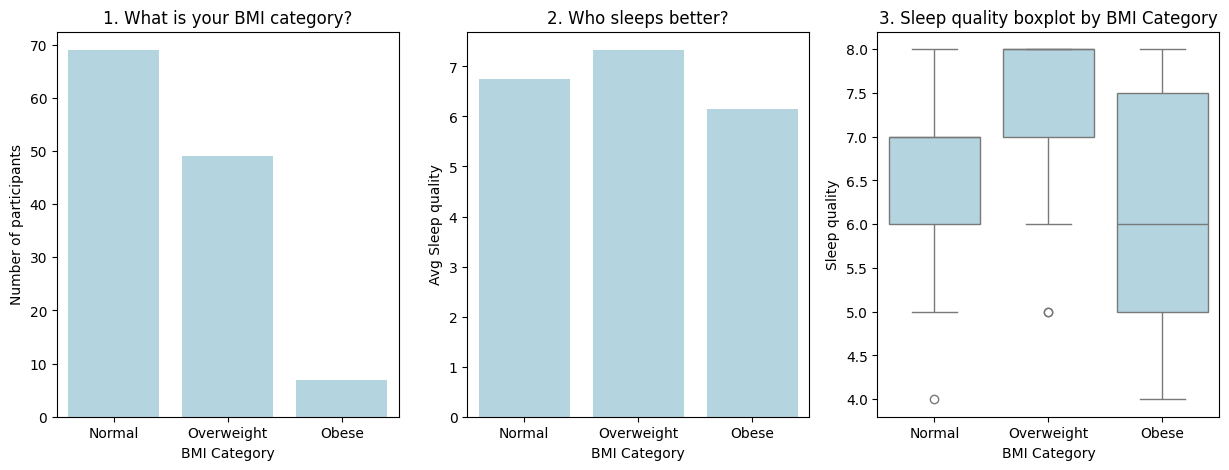

In [69]:
#BMI Category
categoria_ordine_sleep_disorders = ["Normal", "Overweight", "Obese"]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plot 1
sns.countplot(data=df, order=categoria_ordine_sleep_disorders, x="BMI Category", color="lightblue", ax=axs[0]).set_title("1. What is your BMI category?")
axs[0].set(xlabel="BMI Category", ylabel="Number of participants")

# Plot 2
sleep_disorder_quality_mean = df.groupby('BMI Category')['Quality of Sleep'].agg("mean").sort_values(ascending=False).reset_index()
sns.barplot(data=sleep_disorder_quality_mean, order=categoria_ordine_sleep_disorders, x="BMI Category", y="Quality of Sleep", color="lightblue", ax=axs[1]).set_title("2. Who sleeps better?")
axs[1].set(xlabel="BMI Category", ylabel="Avg Sleep quality")

# Plot 3
sns.boxplot(data=df, order=categoria_ordine_sleep_disorders, x="BMI Category", y="Quality of Sleep", color="lightblue", ax=axs[2]).set_title("3. Sleep quality boxplot by BMI Category")
axs[2].set(xlabel="BMI Category", ylabel="Sleep quality")

plt.show()

In [70]:
df.groupby('BMI Category')['Quality of Sleep'].agg(['mean', 'median'])

,mean,median
BMI Category,,
Normal,6.753623,7.0
Obese,6.142857,6.0
Overweight,7.326531,8.0


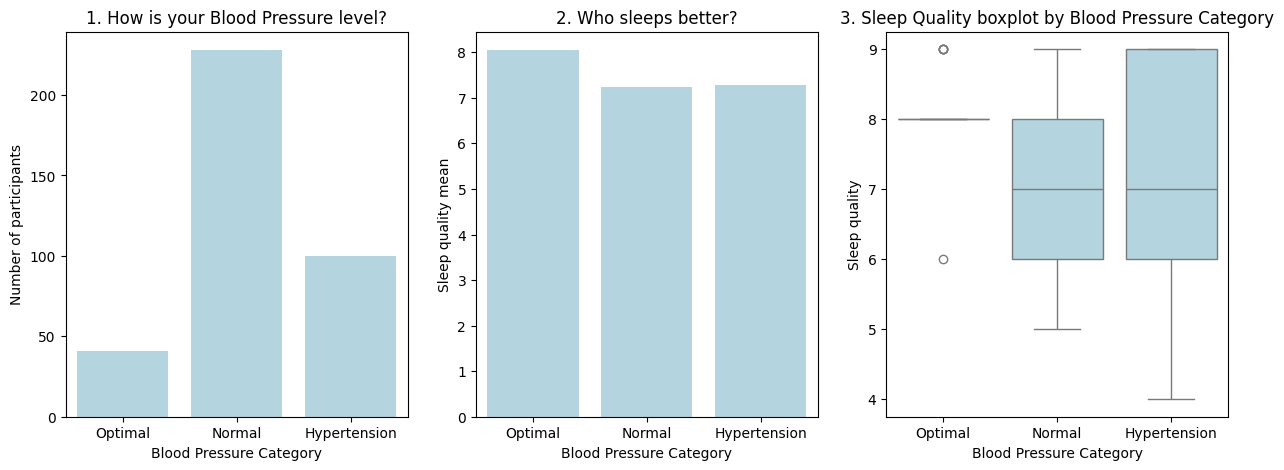

In [72]:
#Blood Pressure Categroy
categoria_ordine_blood_pressure = ["Optimal", "Normal", "Hypertension"]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
sns.countplot(data=df, order=categoria_ordine_blood_pressure, x="Blood Pressure Category", color="lightblue", ax=axs[0]).set_title("1. How is your Blood Pressure level?")
axs[0].set(xlabel="Blood Pressure Category", ylabel="Number of participants")

# Plot 2
sleep_disorder_quality_mean = df.groupby('Blood Pressure Category')['Quality of Sleep'].agg("mean").reset_index()
sns.barplot(data=sleep_disorder_quality_mean, order=categoria_ordine_blood_pressure, x="Blood Pressure Category", y="Quality of Sleep", color="lightblue", ax=axs[1]).set_title("2. Who sleeps better?")
axs[1].set(xlabel="Blood Pressure Category", ylabel="Sleep quality mean")

# Plot 3
sns.boxplot(data=df, order=categoria_ordine_blood_pressure, x="Blood Pressure Category", y="Quality of Sleep", color="lightblue", ax=axs[2]).set_title("3. Sleep Quality boxplot by Blood Pressure Category")
axs[2].set(xlabel="Blood Pressure Category", ylabel="Sleep quality")

plt.show()

In [71]:
df.groupby('Blood Pressure Category')['Quality of Sleep'].agg(['mean', 'median'])

,mean,median
Blood Pressure Category,,
Hypertension,7.280000,7.0
Normal,7.236842,7.0
Optimal,8.048780,8.0


Correlations Between Data

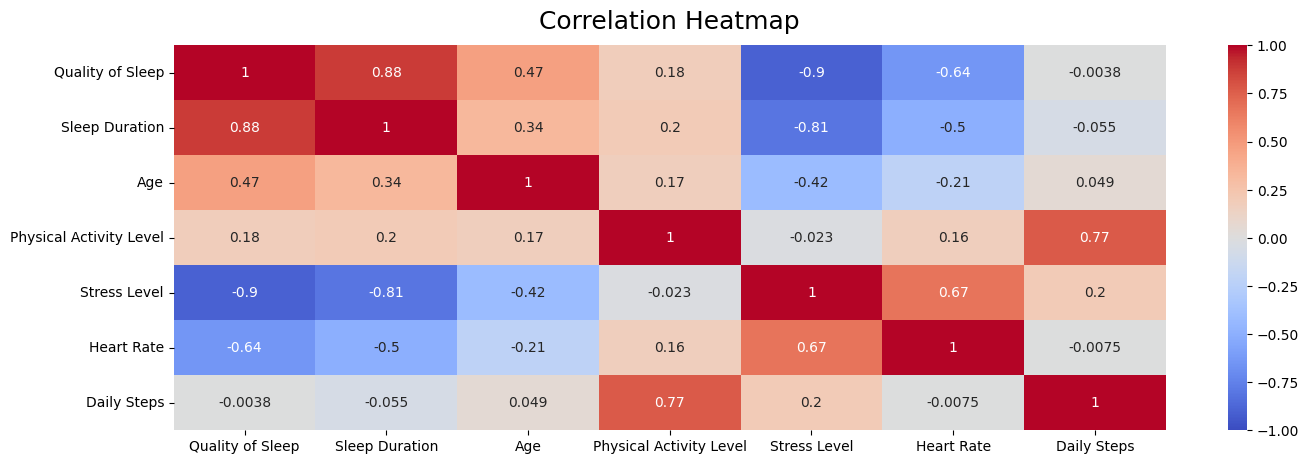

In [73]:
correlation_table = df[["Quality of Sleep", "Sleep Duration", "Age", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]].corr()

plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(correlation_table, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [74]:
# Quality of Sleep Correlation in Descending Order
df_numerico = df.select_dtypes(include=['int', 'float'])
df_numerico.corr()['Quality of Sleep'].sort_values(ascending=False)

Quality of Sleep           1.000000
Sleep Duration             0.882343
Age                        0.467468
Physical Activity Level    0.175773
Daily Steps               -0.003766
Diastolic Pressure        -0.109572
Systolic Pressure         -0.120695
Heart Rate                -0.643487
Stress Level              -0.902318
Name: Quality of Sleep, dtype: float64

Impact of Sleep Duration and Stress on Quality of Sleep

Text(0.5, 1.0, 'More Stress = Bad Rest')

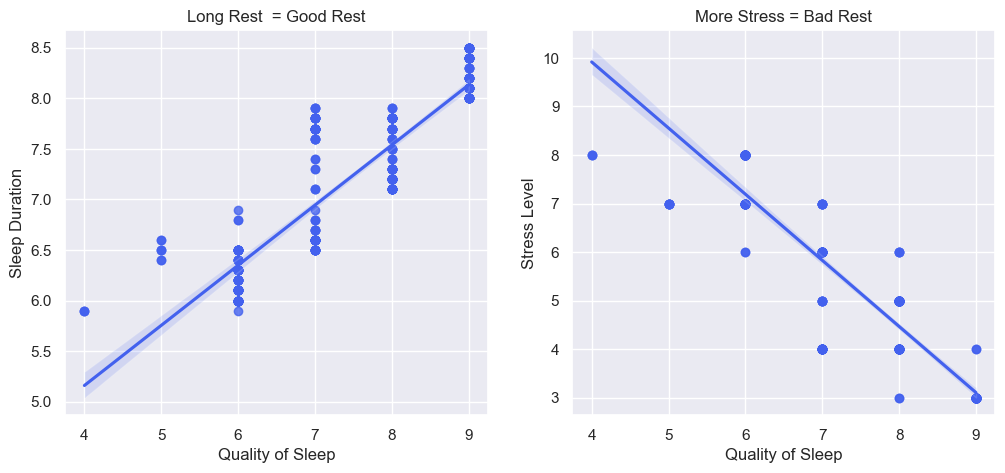

In [75]:
sns.set(font_scale=1)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(data=df, x="Quality of Sleep",y="Sleep Duration",color="#4361EE",ax=axs[0]).set_title("Long Rest  = Good Rest")
sns.regplot(data=df, x="Quality of Sleep",y="Stress Level",color="#4361EE",ax=axs[1]).set_title("More Stress = Bad Rest")

In [76]:
df['Sleep Duration'].corr(df['Stress Level'])

-0.8099759373904472

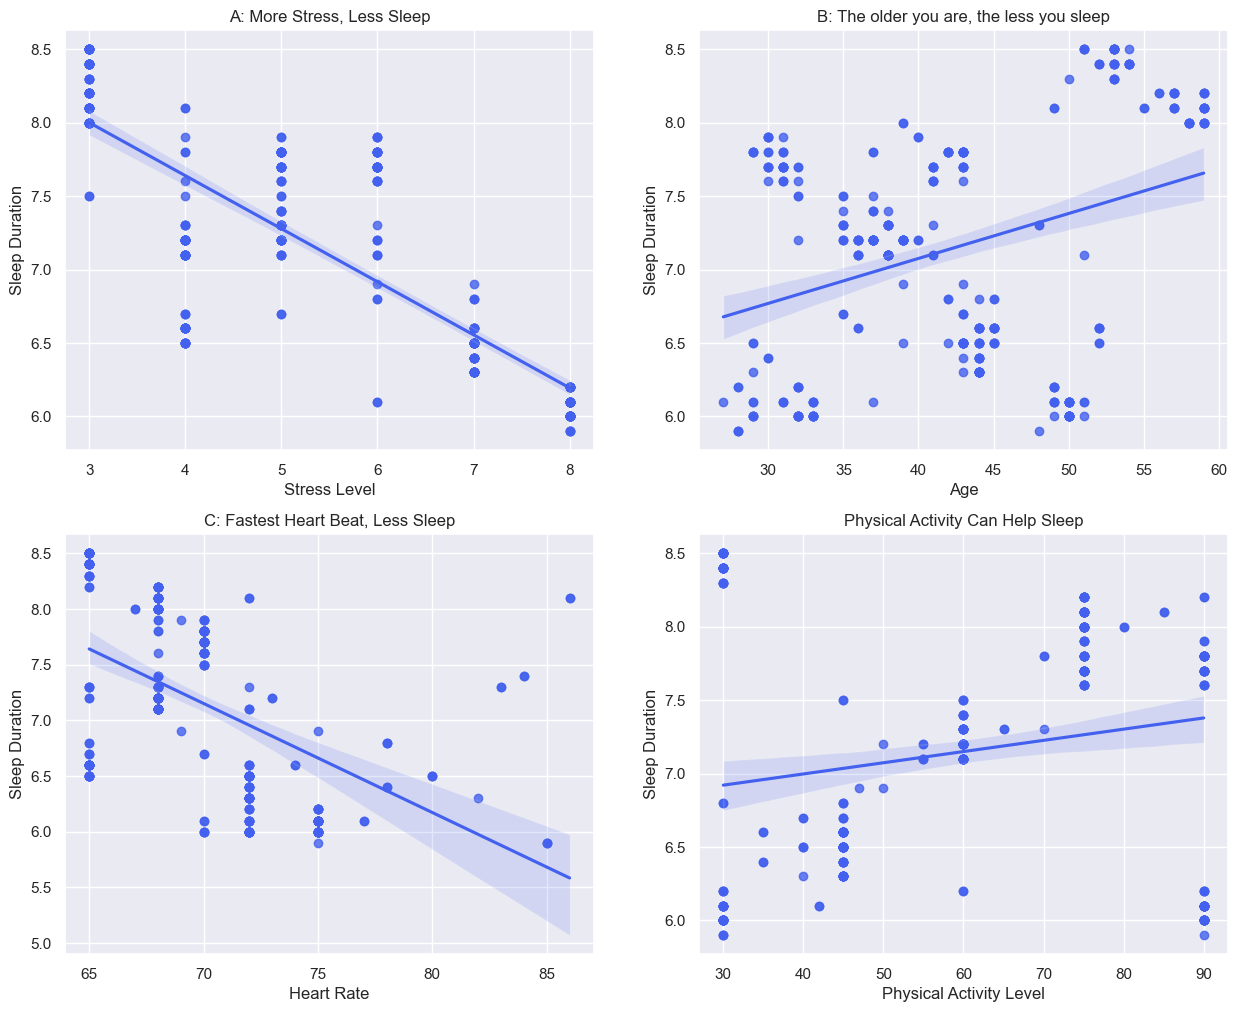

In [77]:
sns.set(font_scale=1)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

sns.regplot(data=df, x="Stress Level",y="Sleep Duration",color="#4361EE",ax=axs[0,0]).set_title("A: More Stress, Less Sleep")
sns.regplot(data=df, x="Age",y="Sleep Duration",color="#4361EE",ax=axs[0,1]).set_title("B: The older you are, the less you sleep")
sns.regplot(data=df, x="Heart Rate",y="Sleep Duration",color="#4361EE",ax=axs[1,0]).set_title("C: Fastest Heart Beat, Less Sleep")
sns.regplot(data=df, x="Physical Activity Level",y="Sleep Duration",color="#4361EE",ax=axs[1,1]).set_title("Physical Activity Can Help Sleep")
plt.show()

Sleep Duration and  Quality of Sleep by Age

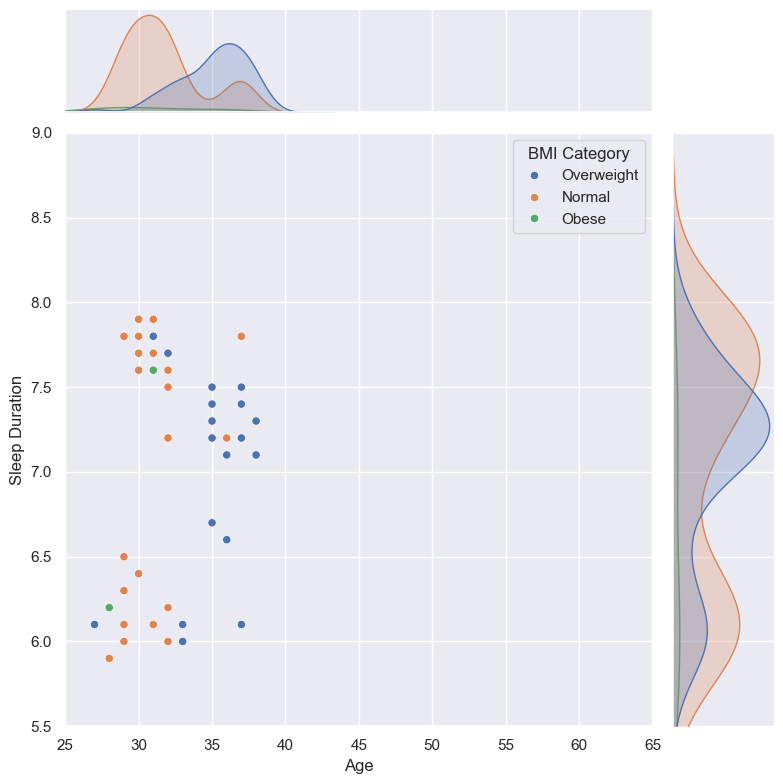

In [78]:
joint_grid = sns.jointplot(data=df, x="Age", y="Sleep Duration", hue = 'BMI Category', height=8)
joint_grid.ax_joint.set_xlim([25, 65])
joint_grid.ax_joint.set_ylim([5.5, 9])
plt.show()

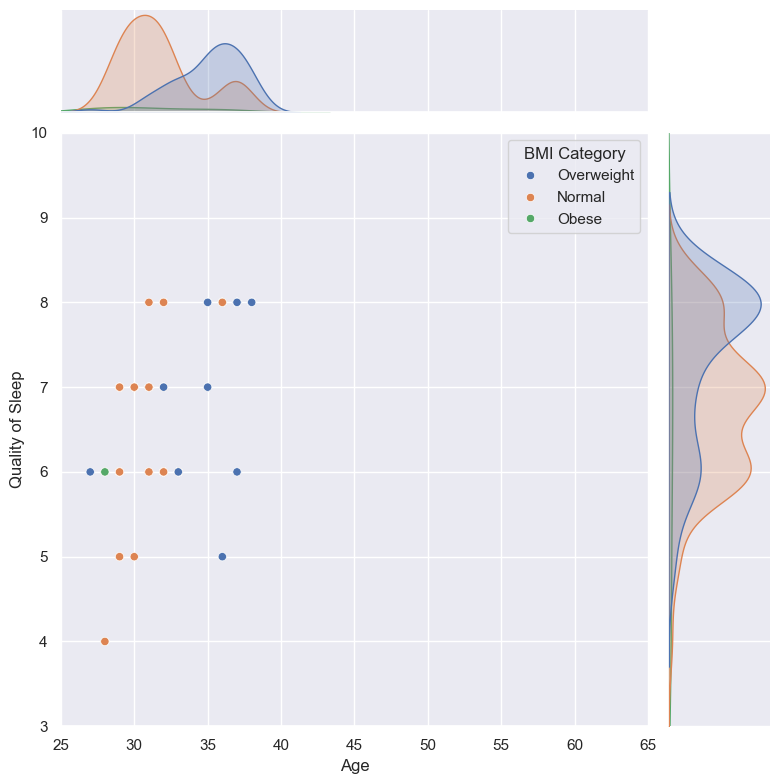

In [79]:
joint_grid = sns.jointplot(data=df, x="Age", y="Quality of Sleep", hue = 'BMI Category', height=8)
joint_grid.ax_joint.set_xlim([25, 65])
joint_grid.ax_joint.set_ylim([3, 10])
plt.show()

Impact of Stress and Heart Beat on Sleep Quality

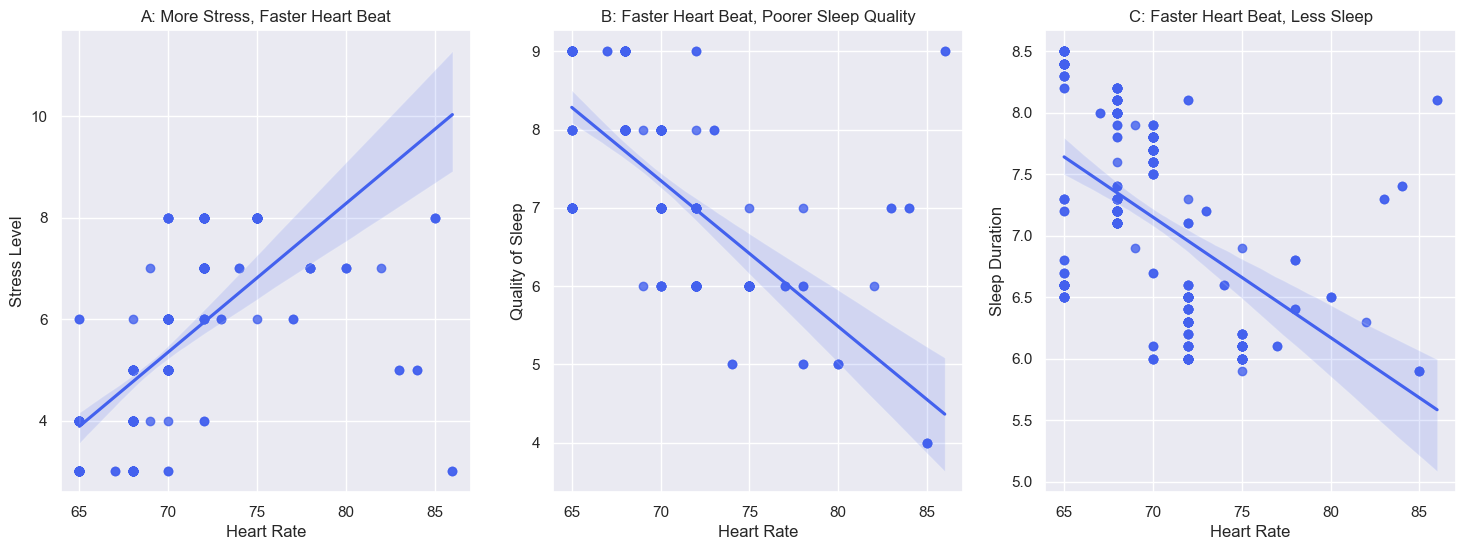

In [80]:
sns.set(font_scale=1)
fig, axs = plt.subplots(1, 3, figsize=(18,6))

sns.regplot(data=df,x="Heart Rate", y="Stress Level",color="#4361EE", ax=axs[0]).set_title("A: More Stress, Faster Heart Beat")
sns.regplot(data=df, x="Heart Rate", y="Quality of Sleep",color="#4361EE",ax=axs[1]).set_title("B: Faster Heart Beat, Poorer Sleep Quality")
sns.regplot(data=df, x="Heart Rate", y="Sleep Duration",color="#4361EE",ax=axs[2]).set_title("C: Faster Heart Beat, Less Sleep")

plt.show()

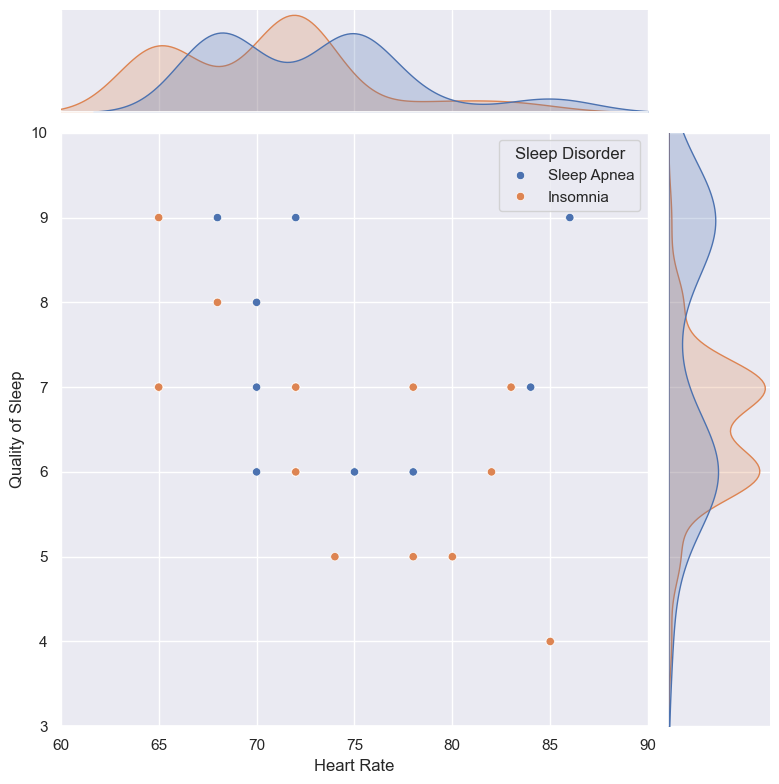

In [81]:
joint_grid = sns.jointplot(data=df, x="Heart Rate", y="Quality of Sleep", hue = 'Sleep Disorder', height=8)
joint_grid.ax_joint.set_xlim([60, 90])
joint_grid.ax_joint.set_ylim([3, 10])
plt.show()

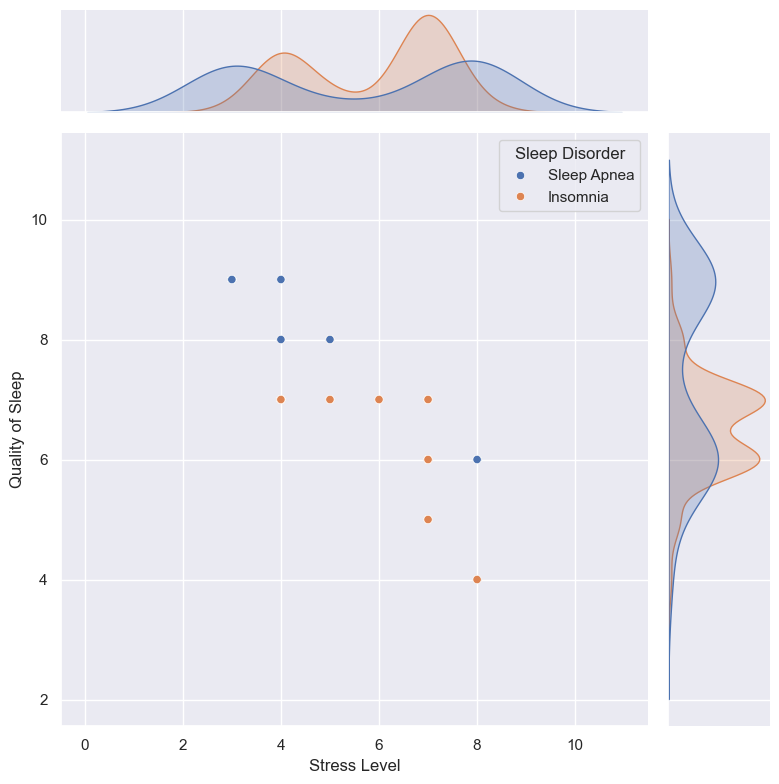

In [82]:
joint_grid = sns.jointplot(data=df, x='Stress Level', y="Quality of Sleep", hue = 'Sleep Disorder', height=8)
plt.show()

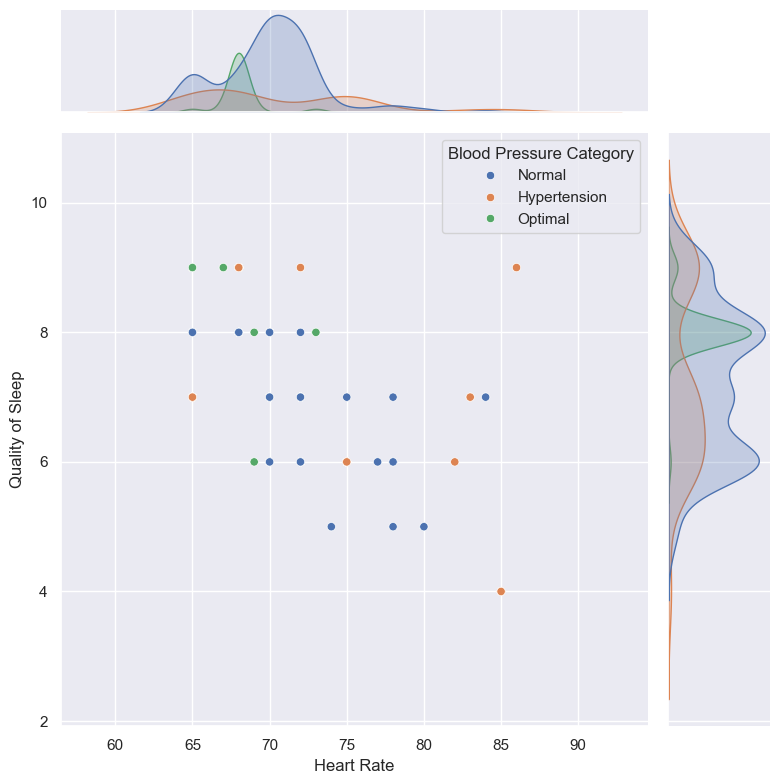

In [83]:
joint_grid = sns.jointplot(data=df, x='Heart Rate', y="Quality of Sleep", hue = 'Blood Pressure Category', height=8)
plt.show()

Impact of Physical Activity on Sleep Duration and Sleep Quality

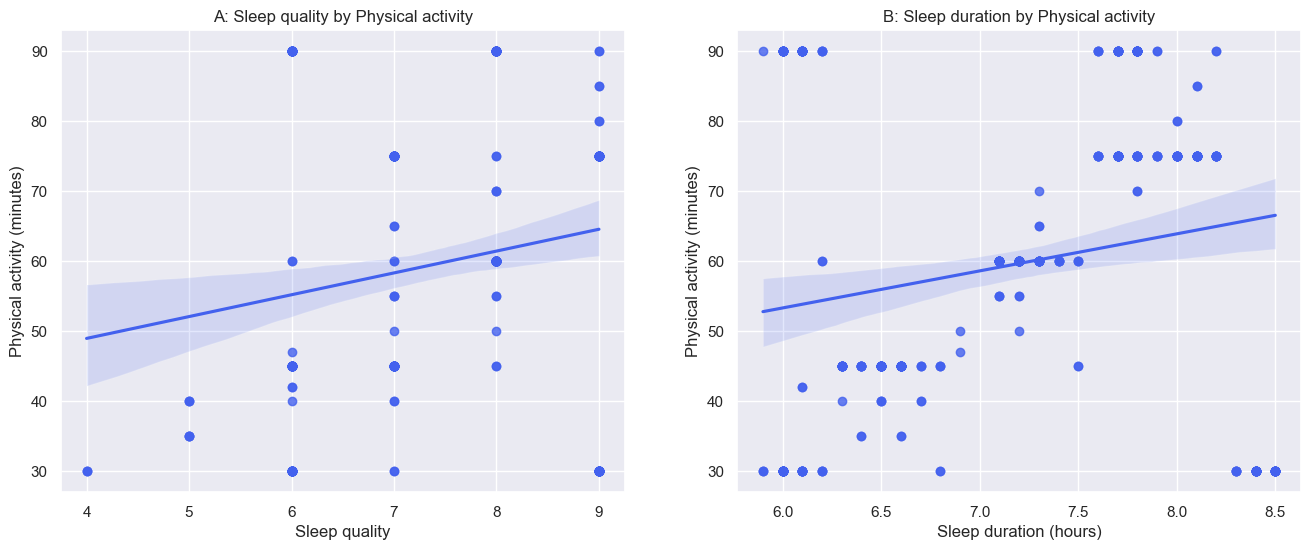

In [84]:
fig, axs = plt.subplots(1,2, figsize=(16,6))

sns.regplot (data=df, y="Physical Activity Level",x="Quality of Sleep", color="#4361EE", ax=axs[0]).set_title("A: Sleep quality by Physical activity")
axs[0].set(xlabel="Sleep quality" , ylabel="Physical activity (minutes)")

sns.regplot (data=df, y="Physical Activity Level",x="Sleep Duration", color="#4361EE", ax=axs[1]).set_title("B: Sleep duration by Physical activity")
axs[1].set(xlabel="Sleep duration (hours)", ylabel="Physical activity (minutes)")

plt.show()

Text(0.5, 1.0, 'A: Sleep quality by Physical activity')

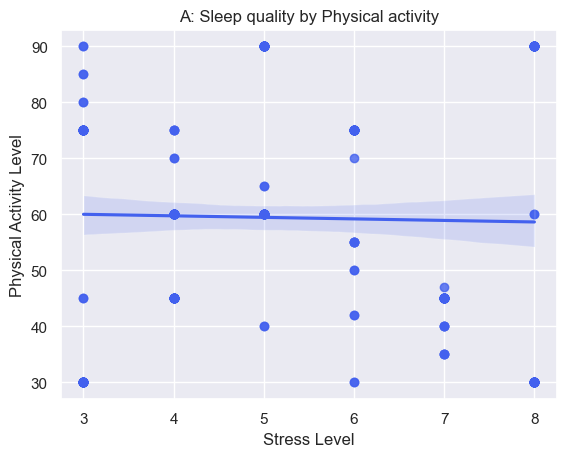

In [85]:
sns.regplot (data=df, y="Physical Activity Level", x="Stress Level", color="#4361EE").set_title("A: Sleep quality by Physical activity")

Resources:

Tharmalingam, L. (2023, September 18). Sleep health and lifestyle dataset. Kaggle. https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data 